In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-17 16:05:15,149 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-17 16:05:15,152 -INFO - common:common.py:618 - Module utils.common is loaded...
2021-06-17 16:05:15,153 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-17 16:05:15,465 -INFO - dataset_builder:dataset_builder.py:207 - dataset package is loaded...
2021-06-17 16:05:15,778 -INFO - dataset:dataset.py:653 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://jdi-testing.github.io/jdi-light/'
LOGIN = 'Roman'
PASSWORD = 'Jdi1234'
SAVE_SCREEN = True
WAIT_TIME_SECONDS = 7
HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
    encoder_dict = { v: k for k, v in decoder_dict.items()}
decoder_dict, encoder_dict

({0: 'button',
  1: 'link',
  2: 'textfield',
  3: 'dropdown',
  4: 'checkbox',
  5: 'radiobutton',
  6: 'textarea',
  7: 'fileinput',
  8: 'iframe',
  9: 'range',
  10: 'progressbar',
  11: 'datetimeselector',
  12: 'colorpicker',
  13: 'numberselector',
  14: 'selector',
  15: 'table',
  16: 'slider-toggle',
  17: 'slider',
  18: 'tree-node',
  19: 'steper',
  20: 'tab',
  21: 'n/a'},
 {'button': 0,
  'link': 1,
  'textfield': 2,
  'dropdown': 3,
  'checkbox': 4,
  'radiobutton': 5,
  'textarea': 6,
  'fileinput': 7,
  'iframe': 8,
  'range': 9,
  'progressbar': 10,
  'datetimeselector': 11,
  'colorpicker': 12,
  'numberselector': 13,
  'selector': 14,
  'table': 15,
  'slider-toggle': 16,
  'slider': 17,
  'tree-node': 18,
  'steper': 19,
  'tab': 20,
  'n/a': 21})

# Generate dataset

In [6]:
DATASET_NAME = 'bootstrap'

In [7]:
# class JDIDatasetBuilder(DatasetBuilder):

#     def setUp(self, driver):
#         self.logger.info(f'getting page')
#         driver.get(SITE_URL)
        
#         driver.find_element_by_id("user-icon").click()
#         driver.find_element_by_id("name").send_keys(LOGIN)
#         driver.find_element_by_id("password").send_keys(PASSWORD)
#         driver.find_element_by_id("login-button").click()
#         sleep(WAIT_TIME_SECONDS)
        
#         driver.find_element_by_link_text("Elements packs").click()
#         driver.find_element_by_link_text("Bootstrap").click()
#         sleep(WAIT_TIME_SECONDS)
        
# #         driver.find_element_by_link_text("Service").click()
# #         driver.find_element_by_link_text("Complex Table").click()
#         maximize_window(driver=driver)
#         sleep(WAIT_TIME_SECONDS)
        

# with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
#     elements_df = builder.dataset
#     plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))

In [8]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [9]:
df = build_features(df)

2021-06-17 16:05:16,244 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [10]:
elements_dict = build_elements_dict(df)

In [11]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

,tag_name,element_id,parent_id,upper_sibling,lower_sibling,displayed,is_hidden,x,y,width,height
0,HTML,4973739856587030102175080298,None,None,None,True,0,0.0,0.0,1183.0,8293.0
1,HEAD,9954865826587030104765252697,4973739856587030102175080298,None,2147395225587030106955122164,False,0,0.0,0.0,0.0,0.0
2,META,1423226163587030104726798704,9954865826587030104765252697,None,6806135118587030100248334190,False,0,0.0,0.0,0.0,0.0
3,TITLE,6806135118587030100248334190,9954865826587030104765252697,1423226163587030104726798704,0731018459587030104351569989,False,0,0.0,0.0,0.0,0.0
4,META,0731018459587030104351569989,9954865826587030104765252697,6806135118587030100248334190,4041834001587030104662455913,False,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1093,SCRIPT,8983154583587030117377592851,2147395225587030106955122164,9385073754587030111570730444,0250484195587030116674135999,False,1,0.0,0.0,0.0,0.0
1094,SCRIPT,0250484195587030116674135999,2147395225587030106955122164,8983154583587030117377592851,3636206321587030113891324495,False,1,0.0,0.0,0.0,0.0
1095,SCRIPT,3636206321587030113891324495,2147395225587030106955122164,0250484195587030116674135999,9230955628587030116907688672,False,1,0.0,0.0,0.0,0.0
1096,SCRIPT,9230955628587030116907688672,2147395225587030106955122164,3636206321587030113891324495,7806949146587030118569953052,False,1,0.0,0.0,0.0,0.0


In [12]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
# predictions_df

2021-06-17 16:05:16,962 -INFO - common:common.py:491 - Num radio buttons found: 3
2021-06-17 16:05:16,965 -INFO - common:common.py:495 - Num radio2 buttons found: 0
2021-06-17 16:05:16,968 -INFO - common:common.py:502 - Num checkboxes found: 0
2021-06-17 16:05:16,972 -INFO - common:common.py:509 - Num comboboxes/dropdowns found: 0
2021-06-17 16:05:16,975 -INFO - common:common.py:520 - Num textfields found: 8
2021-06-17 16:05:16,978 -INFO - common:common.py:525 - Num texfields for numbers found: 0
2021-06-17 16:05:16,980 -INFO - common:common.py:530 - Num ranges found: 4
2021-06-17 16:05:16,983 -INFO - common:common.py:535 - Num ordinary text inputs found: 0
2021-06-17 16:05:16,985 -INFO - common:common.py:538 - Num buttons found: 36
2021-06-17 16:05:16,987 -INFO - common:common.py:543 - Num buttons1 found: 1
2021-06-17 16:05:16,990 -INFO - common:common.py:548 - Num buttons2 (Material-UI) found: 0
2021-06-17 16:05:16,992 -INFO - common:common.py:553 - Num links found: 241
(85, 8)


# **Enrich predictions**

In [13]:
radio_df = df[(df.tag_name == 'MAT-RADIO-BUTTON') &
              df.displayed & (df.is_hidden == 0) & (df.width > 0.0) & (df.height>0.0)
             ].copy()
radio_df['label'] = encoder_dict['radiobutton']
radio_df = radio_df[predictions_df.columns]
radio_df

,element_id,x,y,width,height,displayed,is_hidden,label


In [14]:
checkbox_df = df[(df.tag_name == 'MAT-CHECKBOX') &
              df.displayed & (df.is_hidden == 0) 
             ].copy()
checkbox_df['label'] = encoder_dict['checkbox']
checkbox_df = checkbox_df[predictions_df.columns]
checkbox_df

,element_id,x,y,width,height,displayed,is_hidden,label


In [15]:
slider_toggle_df = df[(df.tag_name == 'MAT-SLIDE-TOGGLE') & df.displayed & (df.is_hidden == 0) 
             ].copy()
slider_toggle_df['label'] = encoder_dict['slider-toggle']
slider_toggle_df = slider_toggle_df[predictions_df.columns]
slider_toggle_df

,element_id,x,y,width,height,displayed,is_hidden,label


In [16]:
selector_df = df[df.tag_name.isin(['MAT-SELECT', 'SELECT']) & df.displayed & (df.is_hidden == 0)].copy()
selector_df['label'] = encoder_dict['selector']
selector_df = selector_df[predictions_df.columns]
selector_df

,element_id,x,y,width,height,displayed,is_hidden,label


In [17]:
text_df = df[(df.tag_name == 'INPUT') &
             (df.attributes.apply(lambda x: 'mat-input-element' in str(x.get('class')))) &
             df.displayed & 
             (df.is_hidden == 0)].copy()
text_df['label'] = encoder_dict['textfield']
text_df = text_df[predictions_df.columns]
text_df

,element_id,x,y,width,height,displayed,is_hidden,label


In [18]:
textarea_df = df[(df.tag_name == 'TEXTAREA') &
             df.displayed & 
             (df.is_hidden == 0)].copy()
textarea_df['label'] = encoder_dict['textarea']
textarea_df = textarea_df[predictions_df.columns]
textarea_df

,element_id,x,y,width,height,displayed,is_hidden,label


In [19]:
tree_df = df[(df.tag_name == 'MAT-TREE-NODE') &
             df.displayed & 
             (df.is_hidden == 0)].copy()
tree_df['label'] = encoder_dict['tree-node']
tree_df = tree_df[predictions_df.columns]
tree_df

,element_id,x,y,width,height,displayed,is_hidden,label


# Put everything together

In [20]:
print(predictions_df.shape, radio_df.shape, checkbox_df.shape, selector_df.shape, text_df.shape, textarea_df.shape, tree_df.shape)
predictions_df = pd.concat([predictions_df, radio_df, checkbox_df, slider_toggle_df, selector_df, text_df, textarea_df, tree_df])

(85, 8) (0, 8) (0, 8) (0, 8) (0, 8) (0, 8) (0, 8)


In [21]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape

In [22]:
# print(img_width, img_height)
# plt.figure(figsize=(15, 500))
# plt.imshow(img, cmap='gray')
# axes = plt.gca()

# for _, r in predictions_df.iterrows():
    
#     patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
#     axes.add_patch(patch)
#     plt.text(r.x, r.y, 
#              decoder_dict[r.label] + ':',  ## + r.element_id, 
#              fontsize = 10, 
#              color = 'white', 
#              backgroundcolor='black',
#              alpha=1.)
    

# Generate and Save Labels

In [23]:
# labels = build_to_yolo(df = predictions_df, img_width=img_width, img_heght=img_height)
# labels

In [24]:
# labeled_df = pd.DataFrame(labels, columns=['label', 'x', 'y', 'width', 'height'])
# labeled_df.label = labeled_df.label.astype(int)
# display(labeled_df)
# labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)

# Preview Labels

In [25]:
boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
boxes_df
boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
boxes_df.head()

,label,x,y,width,height,box
0,0,0.9225,0.299519,0.06,0.004573,"(1071, 2470, 72, 38)"
1,0,0.9225,0.432070,0.06,0.004693,"(1071, 3571, 72, 38)"
2,0,0.9225,0.439110,0.06,0.004573,"(1071, 3630, 72, 38)"
3,0,0.9225,0.446029,0.06,0.004693,"(1071, 3687, 72, 38)"
4,0,0.9225,0.521661,0.06,0.004573,"(1071, 4316, 72, 38)"


In [26]:
# df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings'],
      dtype='object')

In [27]:
columns_to_drop = set(df.columns).intersection(set(['label', 'annotation_line_no', 'iou', 'tag', 'label_text']))
if len(columns_to_drop) >= 0:
    df.drop(columns=columns_to_drop, inplace=True)

In [28]:
df = assign_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=img_width, img_height=img_height)

2021-06-17 16:05:17,575 -INFO - labels:labels.py:55 -  Dataset: bootstrap, assign labels from annotation file: dataset/annotations/bootstrap.txt
2021-06-17 16:05:17,576 -INFO - labels:labels.py:60 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-17 16:05:17,577 -INFO - labels:labels.py:68 - getting "n/a" class code
2021-06-17 16:05:17,578 -INFO - labels:labels.py:75 - "n/a" class code: 21
2021-06-17 16:05:17,579 -INFO - labels:labels.py:90 - Image's (width,height) are taken from image file: dataset/images/bootstrap.png
2021-06-17 16:05:17,783 -INFO - labels:labels.py:96 - Use cache file: dataset/cache-labels/bootstrap.pkl
2021-06-17 16:05:17,812 -INFO - labels:labels.py:99 - 1098 rows

In [29]:
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings', 'idx',
       'label', 'annotation_line_no', 'iou', 'tag', 'label_text', 'dataset'],
      dtype='object')

In [30]:
df.label.value_counts()

21    840
1     189
0      31
2      15
3       6
4       6
17      4
5       3
10      2
16      2
Name: label, dtype: int64

1200 8310


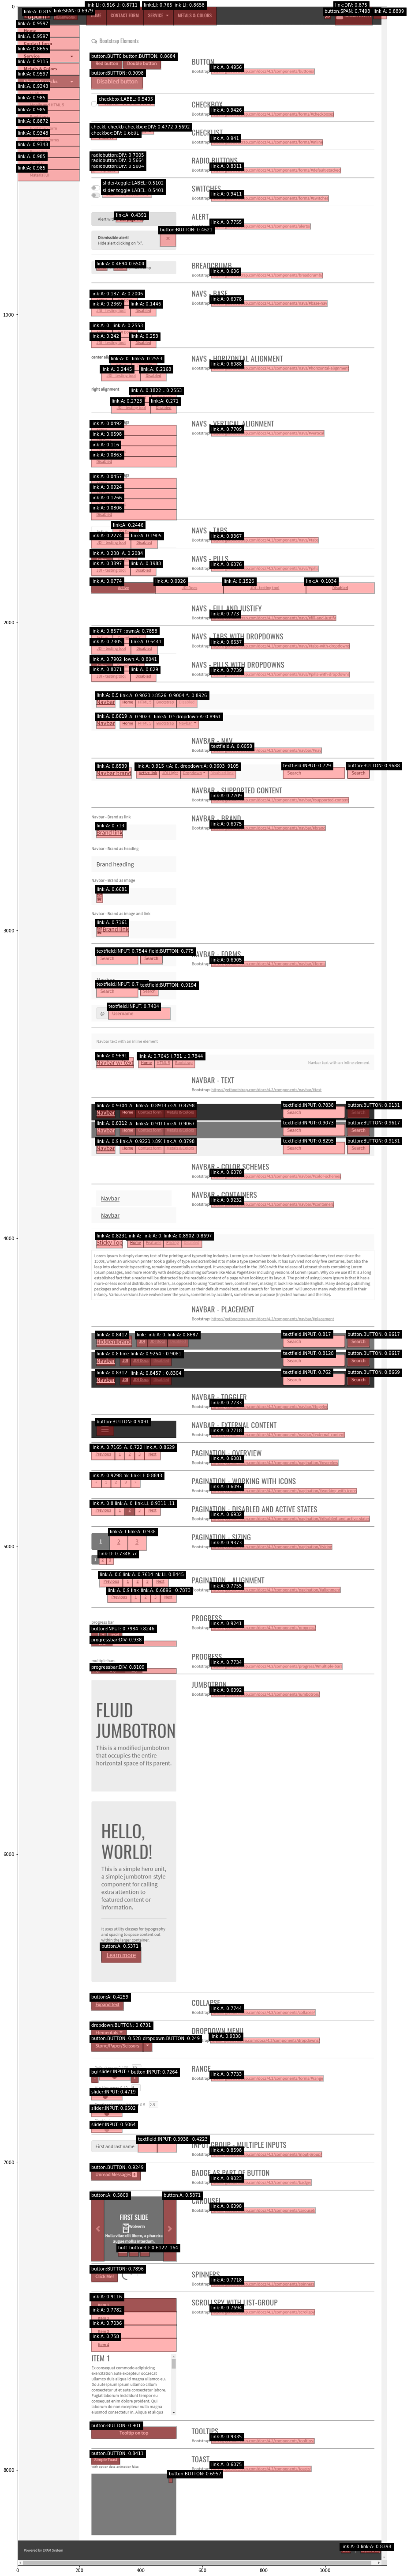

In [31]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 500))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in df[df.label_text != 'n/a'].iterrows():
    x, y, w, h = r.x, r.y, r.width, r.height  
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    
    # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)
    
    axes.add_patch(patch)
    plt.text(x, y, 
             decoder_dict[r.label] + ':' + r.tag_name + ': ' +str(round(r.iou, 4)), # + ':' + str((x, y, w, h)),  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
